Leakage
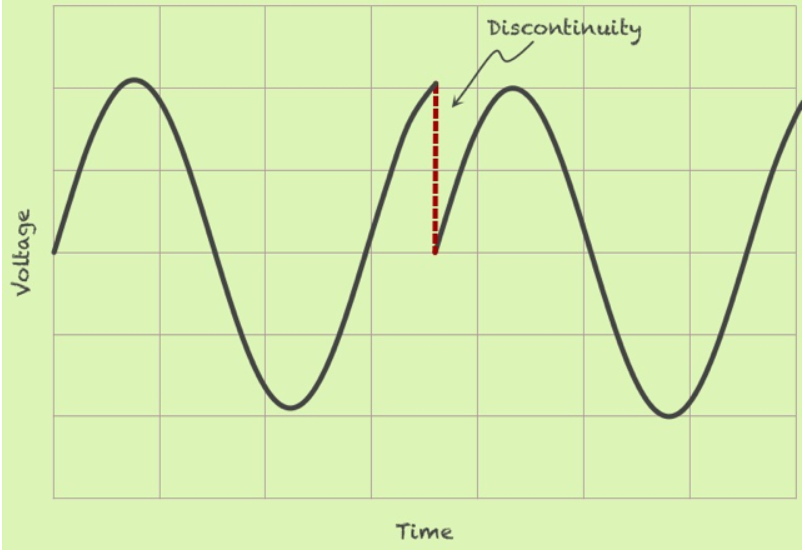
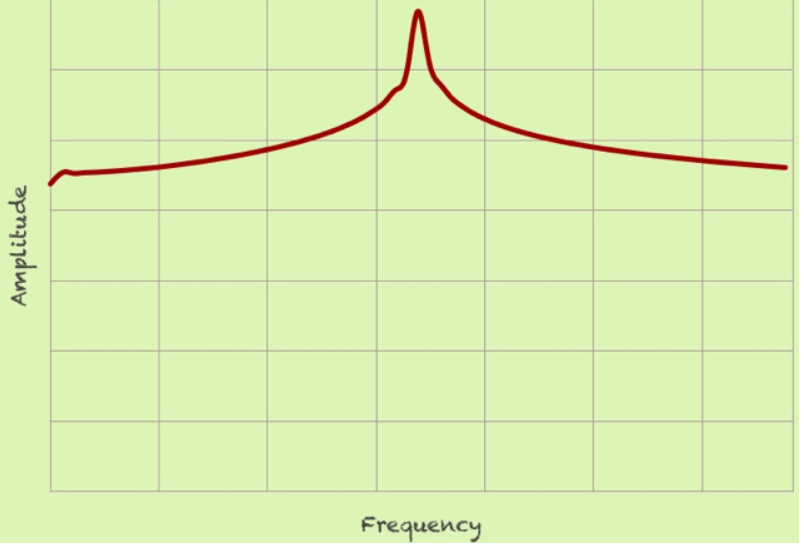

In [ ]:
#Matlab Code
format long g;
format compact; %명령창 출력 표시 설정
fontSize = 15;
[y, Fs] = audioread('D:\무곤\외주\4_24\voice_phishing6.wav');
x = fft(y);
figure;
subplot(3, 2, 1)
xr = real(x);
xi = imag(x);
plot(xr, 'b-');
grid on;
title('real(x)', 'FontSize', fontSize);

%%%%%%%%%%%%%%%%%%%%%%%%

subplot(3, 2, 3)
plot(xi, 'b-');
grid on;
xticks(0:10000:120000); % x축 눈금 10^4씩 증가
title('imag(x)', 'FontSize', fontSize);

%%%%%%%%%%%%%%%%%%%%%%%%

subplot(3, 2, 5)
plot(abs(x), 'b-');
grid on;
title('Magnitude', 'FontSize', fontSize);
### **% Inverse fft just the imaginary part**
y2 = ifft(xi);
y2r = real(y2);
y2i = imag(y2);
subplot(3, 2, 2)
plot(y2r, 'b-');
grid on;
title('real(y2)ifft', 'FontSize', fontSize);

%%%%%%%%%%%%%%%%%%%%%%%%

subplot(3, 2, 4)
plot(y2i, 'b-');
grid on;
xticks(0:10000:120000);
title('imag(y2)ifft', 'FontSize', fontSize);

%%%%%%%%%%%%%%%%%%%%%%%%

### % 한 화면에 plot하기
set(gcf, 'Units', 'Normalized', 'OuterPosition', [0, 0.1, 1, 0.7]);
% [x,y,너비,높이]
soundsc(y2i, 0.7*Fs); %ifft imagenary part

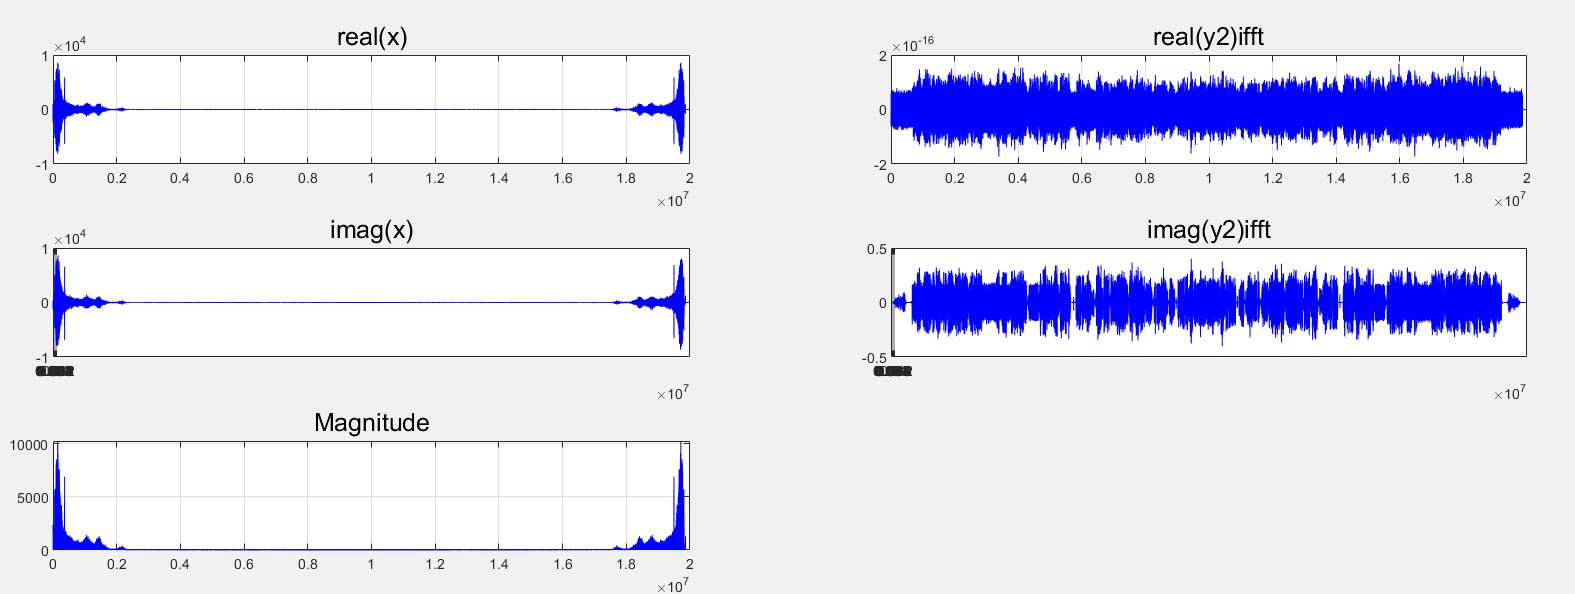

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display as ipd

audio_path = '/content/drive/MyDrive/Colab Notebooks/외주/After_ifft(imagenary).wav'
y, sr = librosa.load(audio_path)
librosa.load(audio_path, sr=None)
# Inverse FFT(허수 영역) 후 voice
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Inverse FFT(실수 영역) 후 voice 출력
audio_path2 = '/content/drive/MyDrive/Colab Notebooks/외주/After_ifft(real).wav'
y, sr = librosa.load(audio_path2)
librosa.load(audio_path2, sr=None)
ipd.Audio(audio_path2)

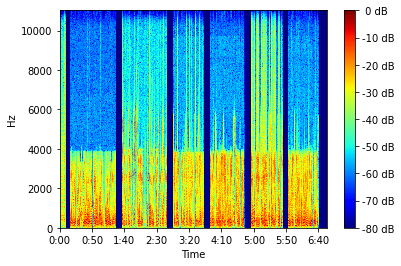

In [ ]:
audio_path3='/content/drive/MyDrive/Colab Notebooks/외주/voice_phishing6.wav'
y, sr = librosa.load(audio_path3)

stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=1024)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='linear', x_axis='time',cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show() #x축은 시간, y축은 Hz, 색상은 dB

In [ ]:
#librosa stft result & mel_spec using stream func
import soundfile as sf
data, samplerate = sf.read('/content/drive/MyDrive/Colab Notebooks/외주/voice_phishing6.wav')
print(data)
print(samplerate)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
48000


In [ ]:
audio_path3='/content/drive/MyDrive/Colab Notebooks/외주/voice_phishing6.wav'
sr = librosa.get_samplerate(audio_path3)
#print(sr) #48,000hz
stream = librosa.stream(audio_path3, block_length=256,frame_length=4096,hop_length=1024) 
for y_block in stream:
    D_block = librosa.stft(y_block,n_fft=4096, win_length = 4096, hop_length=1024, center=False) #streaming에는 왼쪽 정렬 작업이 필요하므로 center=False로 설정
    m_block = librosa.feature.melspectrogram(y_block, sr=sr,n_fft=4096,hop_length=2048,center=False)
    librosa.display.specshow(librosa.amplitude_to_db(m_block, ref=0.00002), sr=sr, hop_length = 2048, y_axis='mel', x_axis='time', cmap = cm.jet)
    plt.colorbar(format='%2.0f dB')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

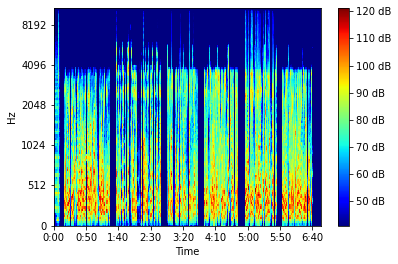

In [ ]:
#Mel Spectogram
n_fft = 4096
win_length = 4096
hop_length = 1024
n_mels = 128

D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.00002), sr=sr, hop_length = hop_length, y_axis='mel', x_axis='time', cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()

##MFCC (Mel Frequency Cepstral Coefficient)



*   압축하는 과정에서 손실이 발생, 노이즈가 제거되는 효과

   **DCT (Discrete Cosine Transform)를 거쳐 나온 결과값**



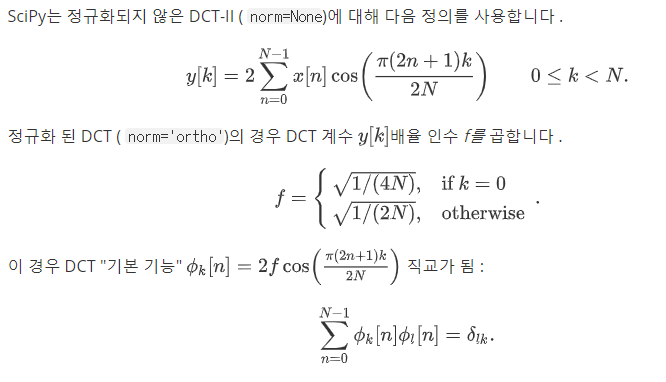


  ex) 주파수 값 = 1000개, sr = 44,100hz == 초당 44,100 점을 찍어 만든 데이터

--> 주파수 분석후 초당 1000개로 표현 가능(RAW데이터 1000개)로 축소
--> 다시 40개로 축소

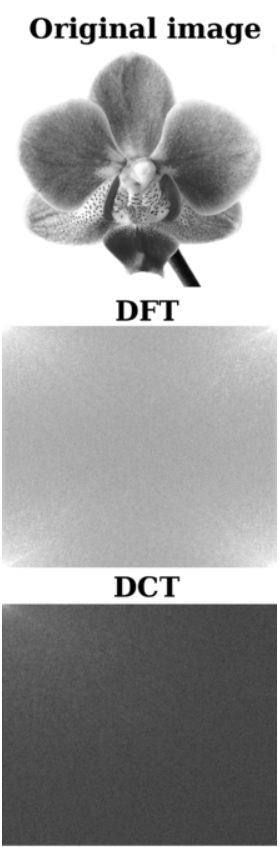















[[-1.73890259e+03 -1.59756311e+03 -1.73139783e+03 ... -8.15183472e+02
  -8.32254639e+02 -7.89253540e+02]
 [ 2.94227295e+01  4.83023453e+01  2.98538551e+01 ...  3.25658813e+02
   3.14059814e+02  2.65697571e+02]
 [-2.97971668e+01 -3.57358322e+01 -2.92806282e+01 ... -4.57693253e+01
  -6.25422211e+01 -3.76364861e+01]
 ...
 [ 1.14772158e+01  1.22272882e+01  1.12529478e+01 ... -2.37227440e-01
   5.25890684e+00  7.69308710e+00]
 [-1.01777563e+01 -1.09708290e+01 -9.88262367e+00 ... -7.66504812e+00
  -4.40045404e+00 -1.08302517e+01]
 [ 9.27578163e+00  1.00241585e+01  9.10696030e+00 ...  1.28644741e+00
   3.19734383e+00  6.13141155e+00]]


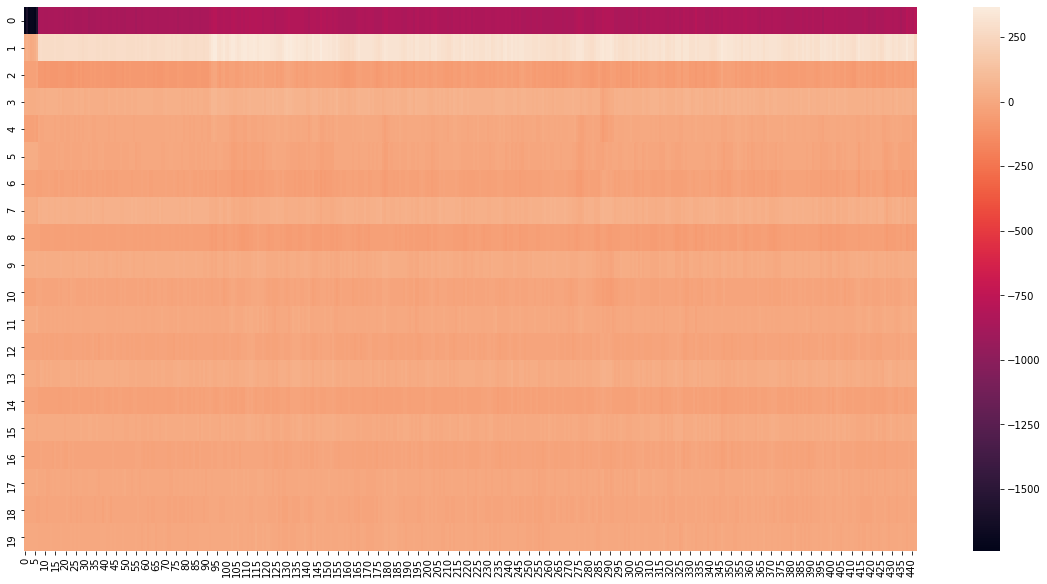

In [ ]:
#MFCC
import seaborn as sns
D = np.abs(librosa.stft(y, n_fft = 2048, win_length = 2048, hop_length = 1024))
#librosa.feature.mfcc(y=None, ,S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
# y = 오디오 시계열 , S = log-power Mel spectrogram 
# n_mfcc = number of MFCCs to return, 압축을 얼마나 할지에 관한 계수
# dct_type = Discrete cosine transform (DCT) type. By default, DCT type-2 is used.
# lifter = (lifter>0)인 경우 계수는 선형에 가까워 진다
# (lifter>0) M[n, :] <- M[n, :] * (1 + sin(pi * (n + 1) / lifter)) * lifter / 2
mfcc = librosa.feature.mfcc(S = librosa.power_to_db(D), sr = sr, n_mfcc = 20)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(mfcc)
print(mfcc)